In [1]:
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import spatial
import random
from collections import Counter
from math import log,sqrt
from sklearn.cluster import KMeans
import csv
import numpy as np
import re

In [2]:
data_path = '../../data/tfidf_pca_umap_20210915/'

In [3]:
fandom_list = [i for i in os.listdir(data_path) if 'tsv' in i]

In [4]:
fandom_list

['doctor_who_&_related_fandoms_tfidf_pca_umap_20210915.tsv',
 'dragon_age_all_media_types_tfidf_pca_umap_20210915.tsv',
 'hamilton_miranda_tfidf_pca_umap_20210915.tsv',
 'tolkien_j_r_r_works_&_related_fandoms_tfidf_pca_umap_20210915.tsv',
 'star_wars_all_media_types_tfidf_pca_umap_20210915.tsv',
 'kuroko_no_basuke_tfidf_pca_umap_20210915.tsv',
 'haikyuu_tfidf_pca_umap_20210915.tsv',
 'one_direction_tfidf_pca_umap_20210915.tsv',
 'ms_paint_adventures_tfidf_pca_umap_20210915.tsv',
 'les_miserables_all_media_types_tfidf_pca_umap_20210915.tsv',
 'shakespare_william_works_tfidf_pca_umap_20210915.tsv',
 'buffy_the_vampire_slayer_tfidf_pca_umap_20210915.tsv',
 'the_walking_dead_&_related_fandoms_tfidf_pca_umap_20210915.tsv',
 'naruto_tfidf_pca_umap_20210915.tsv',
 'arthurian_mythology_&_related_fandoms_tfidf_pca_umap_20210915.tsv',
 'bishoujo_senshi_sailor_moon_tfidf_pca_umap_20210915.tsv',
 'dcu_tfidf_pca_umap_20210915.tsv',
 'hetalia_axis_powers_tfidf_pca_umap_20210915.tsv',
 'attack_on_tit

### Simple clustering

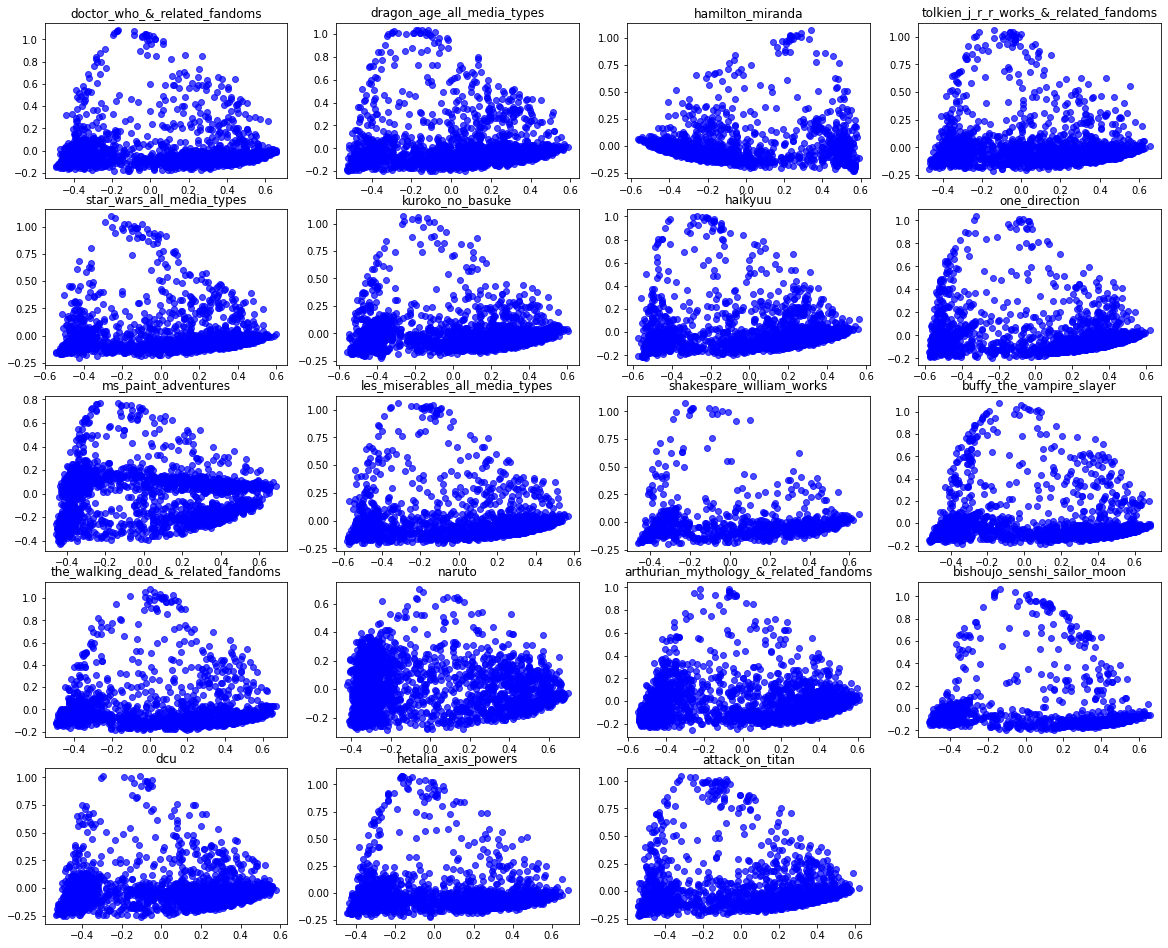

In [8]:
plt.figure(figsize = (20,20))
for i,fandom in enumerate(fandom_list):
    
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    if len(df) > 2000:
        df = df.sample(2000)
    plt.subplot(6,4,i+1)
    plt.scatter(df['pc1'], df['pc2'],alpha=0.7,c='blue')
    plt.title(fandom.replace('_tfidf_pca_umap_20210915.tsv', ''))

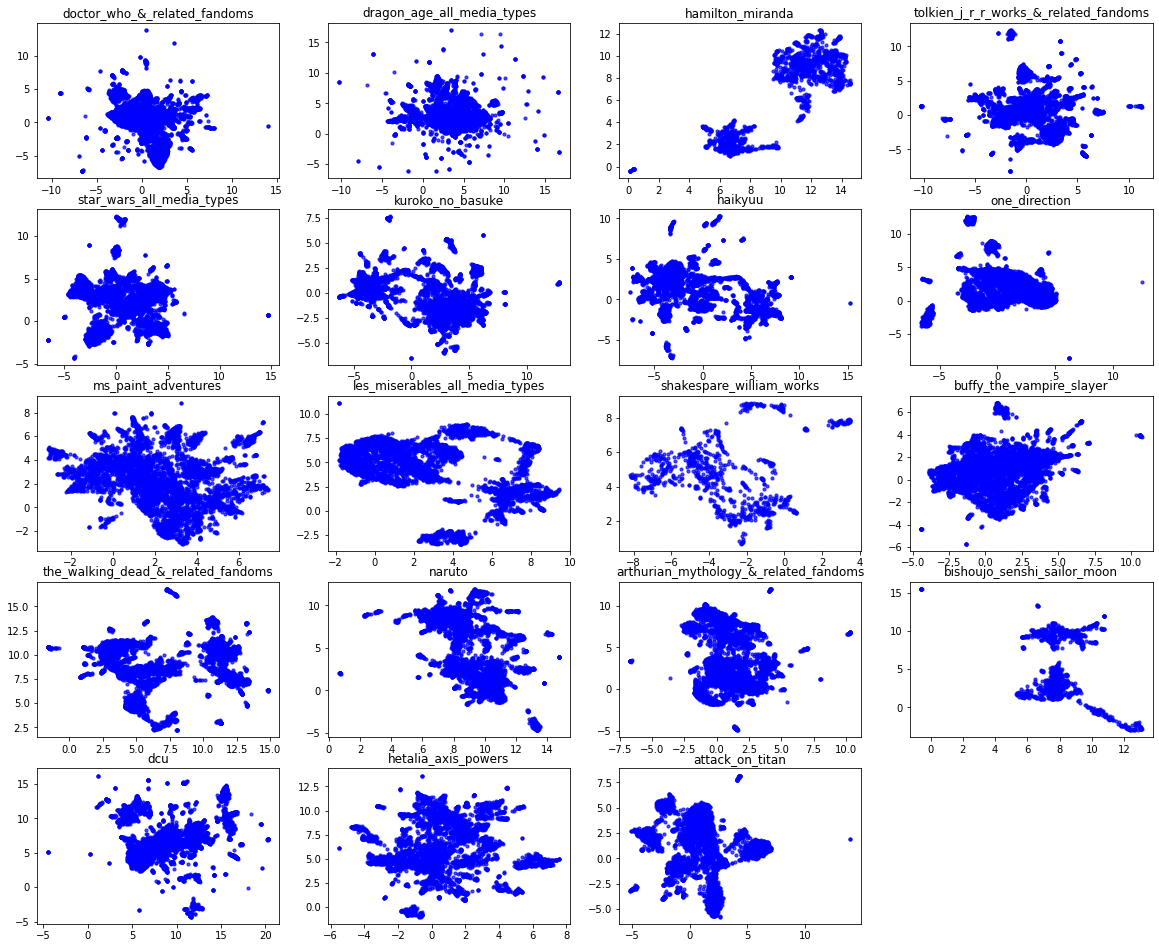

In [9]:
plt.figure(figsize = (20,20))
for i,fandom in enumerate(fandom_list):
    
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    if len(df) > 5000:
        df = df.sample(5000)
    plt.subplot(6,4,i+1)
    plt.scatter(df['umap_1'], df['umap_2'],s=10, alpha=0.7,c='blue')
    plt.title(fandom.replace('_tfidf_pca_umap_20210915.tsv', ''))

### Look at the fics

In [5]:
fandom_list = ['attack_on_titan_tfidf_pca_umap_20210915.tsv']

1 : http://archiveofourown.org/works/4041442
2 : http://archiveofourown.org/works/2367791
3 : http://archiveofourown.org/works/1181785
4 : http://archiveofourown.org/works/4517034/chapters/10293876?view_adult=true
5 : http://archiveofourown.org/works/2281383/chapters/5449967
6 : http://archiveofourown.org/works/5620900
7 : http://archiveofourown.org/works/3086516?view_adult=true
8 : http://archiveofourown.org/works/1471906
9 : http://archiveofourown.org/works/1054513
10 : http://archiveofourown.org/works/998974?view_adult=true
11 : http://archiveofourown.org/works/2127870
12 : http://archiveofourown.org/works/1370482/chapters/2974141?view_adult=true
13 : http://archiveofourown.org/works/4819652/chapters/12255533?view_adult=true
14 : http://archiveofourown.org/works/4159569/chapters/9396243
15 : http://archiveofourown.org/works/4557753/chapters/10375839
16 : http://archiveofourown.org/works/4103170?view_adult=true
17 : http://archiveofourown.org/works/1151180/chapters/2333713?view_adult

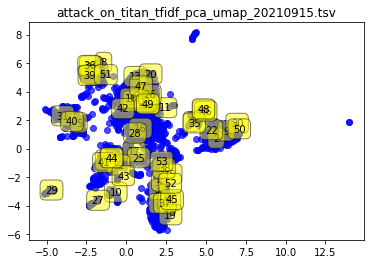

In [12]:
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    if len(df) > 2000:
        df = df.sample(2000)
    plt.figure()
    plt.scatter(df['umap_1'], df['umap_2'],alpha=0.7,c='blue')
    l = 0
    for label, x, y in zip(df['URL'], df['umap_1'], df['umap_2']):
        r = random.randint(0,100)
        if r % 50 == 0:
            plt.annotate(l, xy = (x,y),bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
            l += 1
            print(l, ":", label)
    plt.title(fandom)
    break

In [13]:
def find_close(vec, df):
    min_dist = (0,1)
    for row in df.iterrows():
        row_vec = [row[1]['umap_1'], row[1]['umap_2']]
        if vec != row_vec:
            if spatial.distance.cosine(vec,row_vec) < min_dist[1]:
                min_dist = (row[0], spatial.distance.cosine(vec,row_vec))
    return min_dist

In [14]:
df.columns.values

array(['index', 'AdditionalTags', 'ArchiveWarnings', 'Author',
       'Bookmarks', 'Category', 'Chapters', 'Characters', 'Fandoms',
       'Hits', 'Kudos', 'Language', 'Rating', 'Relationship', 'Title',
       'Words', 'PublishDate', 'UpdateDate', 'CompleteDate', 'Comments',
       'URL', 'pc1', 'pc2', 'umap_1', 'umap_2'], dtype=object)

In [15]:
# df['closest'] = df.apply(lambda row: find_close([row['umap_1'], row['umap_2']], df), axis=1 )

In [16]:
df.head(2)

,index,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,Chapters,Characters,Fandoms,Hits,...,Words,PublishDate,UpdateDate,CompleteDate,Comments,URL,pc1,pc2,umap_1,umap_2
9329,10309,"Fluff, Flowers, flower shop au, punk!Annie, i ...",Creator Chose Not To Use Archive Warnings,disneyprincesslevi,8,F/F,1,"Mikasa Ackerman, Annie Leonhart",['Shingeki no Kyojin | Attack on Titan'],757.0,...,1669.0,2014-09-11,NaN,2014-09-11,12,http://archiveofourown.org/works/2287868,-0.403682,0.040461,-1.987706,-2.461655
11401,10099,"Fluff, Angst, Teacher-Student Relationship, Ch...",Creator Chose Not To Use Archive Warnings,fracturedmoonlight,14,M/M,1,"Eren Yeager, Levi (Shingeki no Kyojin), Petra ...",['Shingeki no Kyojin | Attack on Titan'],1213.0,...,2636.0,2014-12-24,NaN,2014-12-24,5,http://archiveofourown.org/works/2844989,-0.143505,-0.164169,-0.104915,3.778560


In [17]:
df.iloc[2].URL

'http://archiveofourown.org/works/6771022/chapters/15605611?view_adult=true'

In [18]:
df.columns.values

array(['index', 'AdditionalTags', 'ArchiveWarnings', 'Author',
       'Bookmarks', 'Category', 'Chapters', 'Characters', 'Fandoms',
       'Hits', 'Kudos', 'Language', 'Rating', 'Relationship', 'Title',
       'Words', 'PublishDate', 'UpdateDate', 'CompleteDate', 'Comments',
       'URL', 'pc1', 'pc2', 'umap_1', 'umap_2'], dtype=object)

# characters

1 : nan
2 : Levi (Shingeki no Kyojin), Petra Ral, Oluo Bozado, Eld Jinn, Gunther Schultz, Special Operations Squad | Squad Levi
3 : Jean Kirschtein
4 : Annie Leonhart, Armin Arlert, Eren Yeager
5 : Marco Bott, Jean Kirstein, Reiner Braun, Bertolt Hoover, Annie Leonhart, Sasha Blouse, Connie Springer, Eren Yeager, Mikasa Ackerman
6 : Eren Yeager, Levi (Shingeki no Kyojin), Erwin Smith, Armin Arlert, Mikasa Ackerman, Hange Zo\xc3\xab, Mike Zacharias, Reiner Braun, Bertolt Hoover, Moblit Berner, Farlan Church
7 : Eren Yeager, Levi (Shingeki no Kyojin), Armin Arlert
8 : Levi (Shingeki no Kyojin), Levi ackerman, Petra Ral, Oluo Bozado, Eld Jinn, Gunther Schultz, Erwin Smith, Hange Zo\xc3\xab, Mike Zacharias, Nanaba (Shingeki no Kyojin), Eren Yeager, Mikasa Ackerman, Jean Kirstein, Marco Bott, Armin Arlert, Ymir (Shingeki no Kyojin), Sasha Blouse, Connie Springer, Annie Leonhart, Reiner Braun, Bertolt Hoover, Krista Lenz | Historia Reiss, Nile Dok, Nifa (Shingeki no Kyojin)
9 : Levi (Shingek

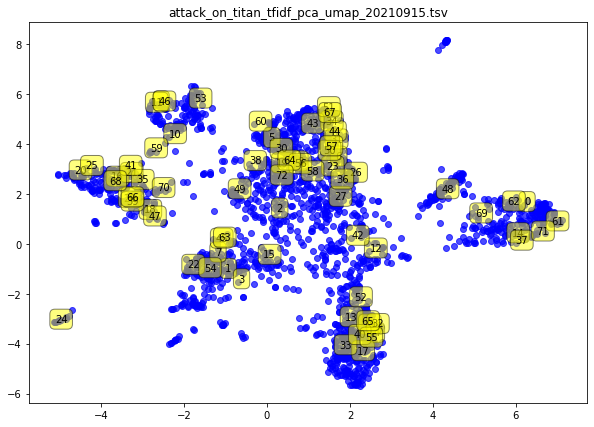

In [19]:
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    if len(df) > 2000:
        df = df.sample(2000)
    plt.figure(figsize=(10,7))
    plt.scatter(df['umap_1'], df['umap_2'],alpha=0.7,c='blue')
    l = 0
    for label, x, y in zip(df['Characters'], df['umap_1'], df['umap_2']):
        r = random.randint(0,100)
        if r % 50 == 0:
            plt.annotate(l, xy = (x,y),bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
            l += 1
            print(l, ":", label)
    plt.title(fandom)
    break

# pairing

1 : Hange Zo\xc3\xab/Levi
2 : Levi/Eren Yeager, Levi/Petra Ral, Hange Zo\xc3\xab & Erwin Smith, Others Maybe?, Levi/Eren Jeager
3 : Levi/Eren Yeager
4 : Levi/Erwin Smith, Hange Zo\xc3\xab/Mike Zacharias, Krista Lenz | Historia Reiss & Ymir, Sasha Blouse & Connie, Reiner Braun/Bertolt Hoover, Annie Leonhart/Armin Arlert, Oluo Bozado/Petra Ral, Marco Bott/Jean Kirstein
5 : Levi/Eren Yeager, Nile Dok/Erwin Smith, Marco Bott/Jean Kirstein, Mikasa Ackerman/Annie Leonhart
6 : Armin Arlert/Jean Kirstein, Jean Kirstein & Eren Yeager
7 : Hange Zo\xc3\xab/Levi, Hange Zo\xc3\xab & Levi
8 : Levi/Eren Yeager
9 : Armin Arlert/Eren Yeager
10 : Levi/Eren Yeager
11 : Levi/Eren Yeager
12 : Reiner Braun & Bertolt Hoover, Bertolt Hoover/Annie Leonhart
13 : Nanaba/Mike Zacharias
14 : Levi & Eren Yeager
15 : Marco Bott/Jean Kirstein
16 : Armin Arlert/Eren Yeager, Armin Arlert/Jean Kirstein
17 : Levi/Eren Yeager, Armin Arlert/Erwin Smith
18 : None
19 : Levi/Erwin Smith, Levi & Erwin Smith
20 : Levi/Erwin Smi

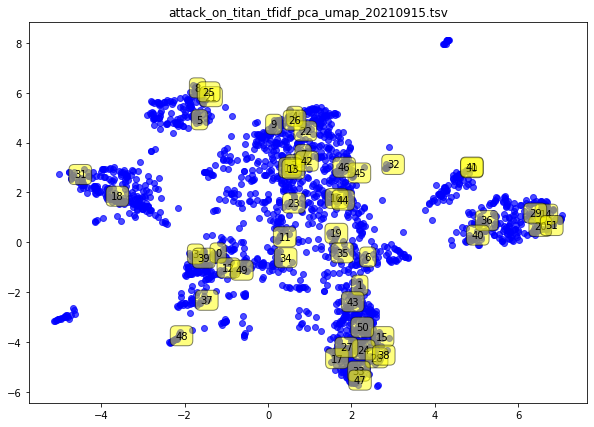

In [20]:
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
#     print(df.col)
    if len(df) > 2000:
        df = df.sample(2000)
    plt.figure(figsize=(10,7))
    plt.scatter(df['umap_1'], df['umap_2'],alpha=0.7,c='blue')
    l = 0
    for label, x, y in zip(df['Relationship'], df['umap_1'], df['umap_2']):
        r = random.randint(0,100)
        if r % 50 == 0:
            plt.annotate(l, xy = (x,y),bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
            l += 1
            print(l, ":", label)
    plt.title(fandom)
    break

In [21]:
fandom_list = ['hamilton_miranda_tfidf_pca_umap_20210915.tsv']

1 : Aaron Burr, Alexander Hamilton, Thomas Jefferson
2 : Alexander Hamilton, John Laurens
3 : Alexander Hamilton, Hercules Mulligan, Gilbert du Motier Marquis de Lafayette, John Laurens, Thomas Jefferson
4 : Alexander Hamilton, John Laurens, Elizabeth "Eliza" Schuyler, Philip Hamilton, Other Character Tags to Be Added, Martha Manning, Frances Laurens
5 : Alexander Hamilton, Elizabeth "Eliza" Schuyler, Angelica Schuyler Church, Margaret "Peggy" Schuyler, HER NAME WAS MARGARITA WHAT THE HECK AO3, John Laurens, George Washington, more to be added
6 : Alexander Hamilton, Angelica Schuyler
7 : Maria Reynolds, Alexander Hamilton, James Reynolds, Aaron Burr
8 : Alexander Hamilton, John Laurens, Angelica Schuyler, Elizabeth "Eliza" Schuyler, Thomas Jefferson
9 : Alexander Hamilton, John Laurens, John Church, Elizabeth "Eliza" Schuyler, Margaret "Peggy" Schuyler, Thomas Jefferson, James Madison, Gilbert du Motier Marquis de Lafayette, Maria Reynolds, James Reynolds, Hercules Mulligan, George Wa

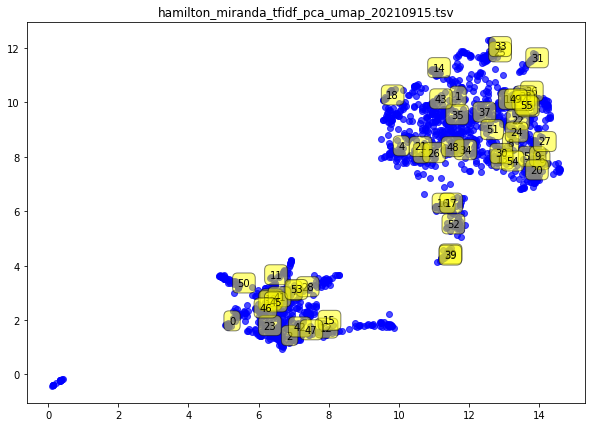

In [22]:
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    if len(df) > 2000:
        df = df.sample(2000)
    plt.figure(figsize=(10,7))
    plt.scatter(df['umap_1'], df['umap_2'],alpha=0.7,c='blue')
    l = 0
    for label, x, y in zip(df['Characters'], df['umap_1'], df['umap_2']):
        r = random.randint(0,100)
        if r % 50 == 0:
            plt.annotate(l, xy = (x,y),bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
            l += 1
            print(l, ":", label)
    plt.title(fandom)
    break

# kmeans

In [30]:
fandom = 'attack_on_titan_tfidf_pca_umap_20210915.tsv'

(2000, 2)


Text(0.5, 1.0, 'attack_on_titan_tfidf_pca_umap_20210915.tsv')

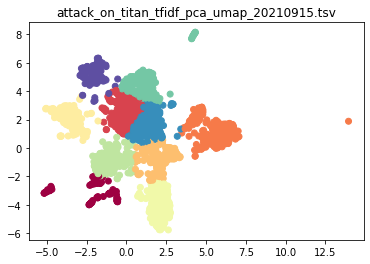

In [31]:
df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
if len(df) > 2000:
    df = df.sample(2000)
umap_reduc = df[['umap_1', 'umap_2']].values
print(umap_reduc.shape)
kmeans = KMeans(n_clusters=10, random_state=0).fit(umap_reduc)
df['cluster'] = kmeans.labels_
plt.figure()
plt.scatter(df['umap_1'], df['umap_2'], c=df['cluster'], cmap='Spectral')

#     l = 0
#     for label, x, y in zip(df['URL'], df['umap_1'], df['umap_2']):
#         r = random.randint(0,100)
#         if r % 50 == 0:
#             plt.annotate(l, xy = (x,y),bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
#             l += 1
#             print(l, ":", label)

plt.title(fandom)


In [36]:
df.cluster.value_counts()

5    293
2    292
7    229
6    220
1    206
4    187
8    184
3    175
9    120
0     94
Name: cluster, dtype: int64

In [16]:
def logodds(corpora_dic, bg_counter):
    """ It calculates the log odds ratio of term i's frequency between 
    a target corpus and another corpus, with the prior information from
    a background corpus. Inputs are:
    
    - a dictionary of Counter objects (corpora of our interest)
    - a Counter objects (background corpus)
    
    Output is a dictionary of dictionaries. Each dictionary contains the log 
    odds ratio of each word. 
    
    """
    corp_size = dict([(c, sum(corpora_dic[c].values())) for c in corpora_dic])
    bg_size = sum(bg_counter.values())
    result = dict([(c, {}) for c in corpora_dic])
    
    for name, c in corpora_dic.items():
        for word in c:
            #if 10 > sum(1 for corpus in corpora_dic.values() if corpus[word]):
            #    continue
            
            fi = c[word]
            fj = sum(co.get(word, 0.01) for x, co in corpora_dic.items() if x != name)
            fbg = bg_counter.get(word, 0.01)
            ni = corp_size[name]
            nj = sum(x for idx, x in corp_size.items() if idx != name)
            nbg = bg_size
            oddsratio = log(fi+fbg) - log(ni+nbg-(fi+fbg)) -\
                        log(fj+fbg) + log(nj+nbg-(fj+fbg))
            std = 1.0 / (fi+fbg) + 1.0 / (fj+fbg)
            z = oddsratio / sqrt(std)
            result[name][word] = z
            
    return result

In [15]:
def overrep(df, clu_id1, clu_id2, field):
    df = df.dropna(subset=[field])
    
    df1 = df[df['cluster']==clu_id1]
    df2 = df[df['cluster']==clu_id2]
    
    df_bg = df[df['cluster'] != clu_id1]
    df_bg = df_bg[df_bg['cluster'] != clu_id2]

    ch_list1 = []
    for line in df1[field].tolist():
        ch_list1.extend([item.strip() for item in line.split(',')])
        
    ch_list2 = []
    for line in df2[field].tolist():
        ch_list2.extend([item.strip() for item in line.split(',')])
    
    ch_list_bg = []
    for line in df_bg[field].tolist():
        ch_list_bg.extend([item.strip() for item in line.split(',')])
        
    
    corp_1 = Counter(ch_list1)
    corp_2 = Counter(ch_list2)
    corp_bg = Counter(ch_list_bg)
    

    corp_1 = {k:v for k, v in corp_1.items() if v > 1 }
    corp_2 = {k:v for k, v in corp_2.items() if v > 1 }
    corp_bg = {k:v for k, v in corp_bg.items() if v > 1 }


    result = logodds({'clu1':corp_1, 'clu2':corp_2}, corp_bg)
    print('Overrep in cluster {}: '.format(clu_id1))
    print()
    for k in sorted(result['clu1'], key=result['clu1'].get, reverse=True)[0:15]:
        print(k,result['clu1'][k])
    print()
    
    print('Overrep in cluster {}: '.format(clu_id2))
    print()
    for k in sorted(result['clu2'], key=result['clu2'].get, reverse=True)[0:15]:
        print(k,result['clu2'][k])
#     return sorted(result['fic'], key=result['fic'].get)[0:20]

In [109]:
overrep(df, 5,2, 'Characters')

Overrep in cluster 5: 

Carla Yeager 1.3466082342114436
Grisha Yeager 1.3152936551392405
Levi (Shingeki no Kyojin) 1.1952203185466372
hanji 1.1237685394192563
Oluo Bozado 1.0614240904998915
Hange Zo\xc3\xab 1.037778990138947
Petra Ral 0.9609735529618999
Krista Lenz 0.890517897316702
Ilse Langnar 0.890517897316702
Erwin Smith 0.8697155000470245
Reader 0.8046454229032096
Levi ackerman 0.7773478190785316
Eld Jinn 0.7773478190785316
Isabel Magnolia 0.7666747718751624
Berthold 0.7392249968942505

Overrep in cluster 2: 

Jean Kirstein 4.3337922409958605
Marco Bott 3.8797987073611453
Bertholdt Fubar 0.9878609687536605
Marco Bott\'s Father 0.8669827258660301
Connie Springer 0.8142931874537785
Marco Bott\'s Mother 0.7228189306438948
Jean Kirschstein 0.657396670020521
Armin 0.6436956089496028
Jean Kirstein\'s Mother 0.539958909629148
Marco Bodt 0.539958909629148
Sasha Blouse 0.4678195190235319
Sasha Braus 0.36863924811971827
Jean Kirschtein 0.36863924811971827
Hannes (Shingeki no Kyojin) 0.35545

In [110]:
overrep(df, 1,4, 'Characters')

Overrep in cluster 1: 

Eren Yeager 1.9488954403065462
Mikasa Ackerman 1.1174298560291298
Carla Yeager 1.0738837880449918
Kenny Ackerman 0.8827946313563682
Armin Arlert 0.8593675241328081
Farlan Church 0.7954434458084529
Grisha Yeager 0.795117992370857
OC - Character 0.6762050316208255
Hange Zoe (mentioned) 0.6420476935940559
The Others 0.6420476935940559
Nile Dok (mentioned) 0.6420476935940559
Kuchel Ackerman 0.5105712081689261
Sasha Blouse 0.497354774556595
Eren 0.4900615581001244
Annie Leonhart 0.48560776429872016

Overrep in cluster 4: 

Erwin Smith 3.7155224523048416
Mike Zacharias 2.532959111528243
Nile Dok 1.4695207833485582
Erwin 1.4012457658714303
Levi (Shingeki no Kyojin) 1.2664007644023207
Armin 0.906133167890461
Marie (Shingeki no Kyojin) 0.7135349367789541
Mike 0.655525362386911
Hange Zo\xc3\xab 0.6359745544489152
Dot Pixis 0.4476529367241182
Moblit Berner 0.4396226761591437
Darius Zackly 0.3508183794929495
Levi ackerman 0.3267275795222743
Nanaba (Shingeki no Kyojin) 0.319

In [115]:
overrep(df, 8,3, 'Characters')

Overrep in cluster 8: 

Eren Yeager 1.3562517611454812
Levi (Shingeki no Kyojin) 1.301132058574298
Farlan Church 1.101920389333105
Darius Zackly 0.7751518961020422
Survey Corps (Shingeki no Kyojin) 0.73038177174227
Christa 0.7017038533810038
Hitch Dreyse 0.6774221185897972
Dot Pixis 0.6670886022613516
You 0.64937716188127
Kalura Yeager 0.64937716188127
Levi 0.5959720848542616
Eren Jeager 0.5791142837188921
Rico Brzenska 0.5486823875213893
Original Character 0.45397680199952767
Reader 0.4436353873760801

Overrep in cluster 3: 

Sasha Blouse 0.9849986864856414
Connie Springer 0.8357508150204156
Annie Leonhart\'s Father 0.7913475040167918
Nanase Haruka 0.7913475040167918
Hyakuya Mikaela 0.706193861226769
Bertholdt Hoover 0.6902001113980017
Marco Bott\'s Father 0.6902001113980017
Jean Kirschtein 0.6745968428655176
Reiner Braun 0.6599093256128549
Jean Kirstein\'s Mother 0.6523566191500891
Hannah (Shingeki no Kyojin) 0.6481965561044832
Hyakuya Yuuichirou 0.6481965561044832
Nickolas Colton 0.

In [112]:
overrep(df, 5,2, 'Relationship')

Overrep in cluster 5: 

Levi/Eren Yeager 4.265603241859041
Levi/Eren Jaeger 1.4444851622852282
Levi & Eren Yeager 1.313527172340103
Hange Zo\xc3\xab/Erwin Smith 1.2084037838824613
Armin Arlert & Erwin Smith 0.9744811424283787
Levi (Shingeki no Kyojin)/Reader 0.9572368715350341
Bertolt Hoover/Annie Leonhart 0.9299192893388313
Mikasa Ackerman/Armin Arlert 0.8871314073985653
Armin Arlert/Erwin Smith 0.8792661858769212
Krista Lenz | Historia Reiss/Ymir 0.8418867188337362
Ereri - Relationship 0.8077142880766653
Armin Arlert/Reader 0.7937431653651305
Levi/OC 0.7937431653651305
Mikasa Ackerman/Annie Leonhart 0.7641177922928274
Oluo Bozado/Petra Ral 0.7483254470627275

Overrep in cluster 2: 

Jean Kirstein/Eren Yeager 5.055246427030301
Marco Bott/Jean Kirstein 4.382186388667747
Marco Bott & Jean Kirstein 2.746843701306285
Jean Kirstein & Eren Yeager 1.677472473150857
Jean Kirstein/Reader 1.2710167483997858
Marco Bott/Eren Yeager 1.2305010862196384
Jean Kirstein/Marco Bott 1.137866208069158
Jea

In [113]:
overrep(df, 1,4, 'Relationship')

Overrep in cluster 1: 

Levi/Eren Yeager 3.300297712051937
Levi/Erwin Smith/Eren Yeager 1.9106990046794399
Erwin Smith/Eren Yeager 1.8070137860475592
Levi/Reader 1.4024452418306317
levi x reader 0.9627277853058861
Mikasa Ackerman & Armin Arlert & Eren Yeager 0.865100087800877
Carla Yeager/Grisha Yeager 0.7053542856901645
eren/levi 0.6473269214222572
Levi (Shingeki no Kyojin)/Original Character(s) 0.6089875549171032
Eren Yeager/Reader 0.5981379471559305
Hange Zo\xc3\xab/Erwin Smith 0.5719940687412508
Ereri - Relationship 0.5719940687412508
Levi/Petra Ral 0.5618821196842182
Mikasa Ackerman/Jean Kirstein 0.5552438528571599
Levi & Eren Yeager 0.47249199777631673

Overrep in cluster 4: 

Levi/Erwin Smith 7.586663121569716
Levi & Erwin Smith 2.4916090706696625
Erwin Smith/Mike Zacharias 2.1509777866125033
Erwin Smith/Reader 0.912681905792597
Moblit Berner/Hange Zo\xc3\xab 0.9084832941159353
Nanaba/Mike Zacharias 0.876188321189309
eruri 0.8651382114143955
Levi/Mike Zacharias 0.749503447280617

In [114]:
overrep(df, 7,6, 'Relationship')

Overrep in cluster 7: 

Levi/Eren Yeager 6.601041049145354
Levi & Eren Yeager 1.7823280108932507
Levi/Eren 0.7975389946645238
Erwin/Levi 0.6975390263129274
Bertolt Hoover/Annie Leonhart 0.6866380817593105
Levi (Shingeki no Kyojin)/Original Titan Character(s) 0.6489495984613438
Reiner Braun/Krista Lenz | Historia Reiss 0.6489495984613438
Eren x Levi 0.6489495984613438
Reiner Braun/Bertolt Hoover 0.6365774564104287
Reiner Braun & Bertolt Hoover & Annie Leonhart 0.6268889130142605
Reiner Braun/Bertolt Hoover/Annie Leonhart 0.5739221302185625
Erwin Smith/Mike Zacharias 0.5409113163409116
Minor or Background Relationship(s) 0.44721444201176275
Armin Arlert/Erwin Smith 0.44175513148828943
Eren Yeager/Reader 0.40904301464641657

Overrep in cluster 6: 

Hange Zo\xc3\xab/Levi 4.15350765442165
Mikasa Ackerman/Levi 3.3799290714700847
Hange Zo\xc3\xab & Levi 2.9273543017403183
Levi/Petra Ral 2.1237069227755665
Mikasa Ackerman/Eren Yeager 1.8899683507925251
Oluo Bozado/Petra Ral 1.6033471867188553


# Control for novelty

In [5]:
tfidf_path = '../../data/tfidf_merged_chs_20211216_nocrossover/'
lda_path = '../../data/lda_merged_chs_202101216_no_crossover/'

In [25]:
fandom_list = ['kuroko_no_basuke']

In [27]:
for i,fandom in enumerate(fandom_list):
    df_tfidf = pd.read_csv(os.path.join(tfidf_path,fandom + '_temporal_tfidf_cos_merged_chapters_20211216_no_crossover.tsv'), \
                           sep = '\t',  quoting=csv.QUOTE_NONE)
    del df_tfidf['index']
    df_lda = pd.read_csv(os.path.join(lda_path,fandom + '_lda_with_dist_merged_chs_no_crossover_20211216.tsv'),\
                         sep = '\t',  quoting=csv.QUOTE_NONE)
#     df['Topic_entropy'] = df.apply(lambda row: entropy(eval(row['Dist'])), axis=1)

    del df_lda['index']
    df_tfidf = df_tfidf.astype('object')
    df_lda = df_lda.astype('object')

    #     df_tfidf['Chapters'] = df_tfidf.astype('object')
    df = pd.merge(df_tfidf, df_lda, on=['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks', 'Category',\
 'Chapters' ,'Characters','Comments' ,'CompleteDate',\
 'Fandoms', 'Hits' ,'Kudos', 'Language' ,'PublishDate' ,'Rating',\
 'Relationship','Title' ,'URL' ,'UpdateDate' ,'Words'], how='inner')

    df = df.replace([np.inf, -np.inf], np.nan)
    df['Hits'].fillna(0, inplace=True)
    df['Kudos'].fillna(0, inplace=True)
    df['Bookmarks'].fillna(0, inplace=True)
    df['Comments'].fillna(0, inplace=True)
    
    df_text = pd.read_csv(fandom + '_preprocessed_filter_en_merged_chs_20211216_no_crossover.tsv', sep = '\t')
    
    df = pd.merge(df, df_text, on=['AdditionalTags', 'ArchiveWarnings', 'Author', 'Category',\
 'Chapters' ,'Characters', 'Fandoms' ,'Kudos', 'Language'  ,'Rating', 'Relationship','Title','Words'], how='inner')


In [28]:
df.head(2)

,AdditionalTags,ArchiveWarnings,Author,Category,Chapters,Characters,Fandoms,Kudos,Language,Rating,...,Dist,JSD,Text,PublishDate_y,UpdateDate_y,CompleteDate_y,Comments_y,Hits_y,Bookmarks_y,URL_y
0,AU,Creator Chose Not To Use Archive Warnings,JeanSouth,F/FM/M,7,NaN,['Kuroko no Basuke | Kuroko&#x27;s Basketball'],314.0,English,Not Rated,...,"[3.7975558e-06, 3.7975558e-06, 3.7975558e-06, ...",0.353605,\xe2\x80\x9cI don\xe2\x80\x99t see a lot of va...,2012-11-28,NaN,2012-12-04,9,37555.0,280,http://archiveofourown.org/works/576433/chapte...
1,"AU, Mpreg, Extremely Clich\xc3\xa9 Domestic Di...",No Archive Warnings Apply,Armistice,F/MM/MOther,1,"Aomine Daiki, Kagami Taiga, Kise Ryouta, Kurok...",['Kuroko no Basuke | Kuroko&#x27;s Basketball'],115.0,English,Teen And Up Audiences,...,"[1.7389379e-05, 1.7389379e-05, 1.7389379e-05, ...",0.400985,\n\xc2\xa0\xc2\xa0\xc2\xa0\xc2\xa0\xc2\xa0\n(A...,2012-11-04,NaN,2012-11-04,2,0.0,14,http://archiveofourown.org/works/554767


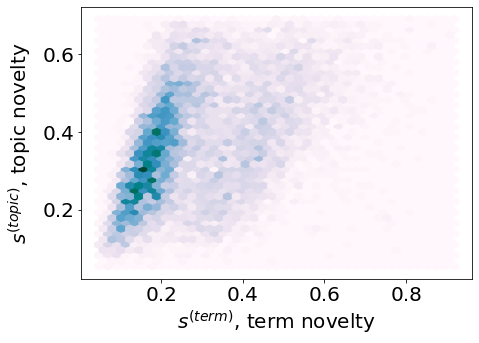

In [29]:
fig, ax = plt.subplots(1,1,figsize = (7,5))

h1 = ax.hexbin(df['Cos'], df['JSD'], gridsize=40, cmap='PuBuGn')
ax.set_xlabel('$\it{s}^{(term)}$, term novelty', fontsize=20)
ax.set_ylabel('$\it{s}^{(topic)}$, topic novelty', fontsize=20)
ax.yaxis.set_label_coords(-0.12, 0.5)
ax.tick_params(labelsize=20)
# divider = make_axes_locatable(ax)
# cax1 = divider.append_axes("right",size="5%",pad=0.2)
# cbar1 = ax.figure.colorbar(h1, cax=cax1)
# cbar1.ax.tick_params(labelsize=15)
# ax.text(0.8, 0.6, 'Kudos', fontsize=20)



In [30]:
first_term_clu = df[df['Cos']>0.1]
first_term_clu = first_term_clu[first_term_clu['Cos']<0.2]
first_term_clu = first_term_clu[first_term_clu['JSD']>=0.28]
first_term_clu = first_term_clu[first_term_clu['JSD']<=0.32]

In [31]:
second_term_clu = df[df['Cos']>0.3]
second_term_clu = second_term_clu[second_term_clu['Cos']<0.4]
second_term_clu = second_term_clu[second_term_clu['JSD']>=0.28]
second_term_clu = second_term_clu[second_term_clu['JSD']<=0.32]

In [32]:
len(df), len(first_term_clu), len(second_term_clu)

(9103, 367, 124)

In [33]:
def overrep_control_nov(df_bg, df1, df2, field):
    df_bg = df_bg.dropna(subset=[field])
    df1 = df1.dropna(subset=[field])
    df2 = df2.dropna(subset=[field])

    
    ch_list1 = []
    for line in df1[field].tolist():
        ch_list1.extend([item.strip() for item in line.split(',')])
        
    ch_list2 = []
    for line in df2[field].tolist():
        ch_list2.extend([item.strip() for item in line.split(',')])
    
    ch_list_bg = []
    for line in df_bg[field].tolist():
        ch_list_bg.extend([item.strip() for item in line.split(',')])
        
    
    corp_1 = Counter(ch_list1)
    corp_2 = Counter(ch_list2)
    corp_bg = Counter(ch_list_bg)
    

    corp_1 = {k:v for k, v in corp_1.items() if v > 1 }
    corp_2 = {k:v for k, v in corp_2.items() if v > 1 }
    corp_bg = {k:v for k, v in corp_bg.items() if v > 1 }


    result = logodds({'clu1':corp_1, 'clu2':corp_2}, corp_bg)
    print('Overrep in first term cluster: ')
    print()
    for k in sorted(result['clu1'], key=result['clu1'].get, reverse=True)[0:15]:
        print(k,result['clu1'][k])
    print()
    
    print('Overrep in second term cluster: ')
    print()
    for k in sorted(result['clu2'], key=result['clu2'].get, reverse=True)[0:15]:
        print(k,result['clu2'][k])
#     return sorted(result['fic'], key=result['fic'].get)[0:20]

In [34]:
overrep_control_nov(df, first_term_clu, second_term_clu, 'Relationship')

Overrep in first term cluster: 

Miyaji Yuuya/Takao Kazunari 0.6669128376011557
Aomine Daiki/Kagami Taiga/Momoi Satsuki 0.5922463026020021
Akashi Seijuurou/Kuroko Tetsuya/Mayuzumi Chihiro 0.5357351691603468
Akashi Seijuurou/Kuroko Tetsuya 0.4363997449286876
Aomine Daiki/Kagami Taiga/Kise Ryouta 0.387137978524387
Aomine Daiki/Midorima Shintarou 0.2996358296991768
Kagami Taiga/Kuroko Tetsuya 0.2897466333489711
Himuro Tatsuya/Liu Wei 0.2685966585788641
Akashi Seijuurou/Kise Ryouta 0.26757391179534745
Kuroko Tetsuya/Mayuzumi Chihiro 0.2604601755408406
Akashi Seijuurou/Midorima Shintarou 0.21648190586545554
Kuroko Tetsuya/Takao Kazunari 0.20022635693396476
Aomine Daiki/Kise Ryouta 0.19605242793313285
Himuro Tatsuya & Kagami Taiga 0.1936248550743436
Akashi Seijuurou/Aomine Daiki 0.18130989828622643

Overrep in second term cluster: 

imakasa 0.6576877677606474
aokise 0.5005268769574267
murahimu - Relationship 0.49143812808886966
midotaka 0.45756464162502203
kagakuro 0.4115477954290151
Imayosh

In [35]:
overrep_control_nov(df, first_term_clu, second_term_clu, 'ArchiveWarnings')

Overrep in first term cluster: 

No Archive Warnings Apply 0.46074602187509256
Rape/Non-Con 0.23776190531000332
Underage 0.23030073924737873
Graphic Depictions Of Violence 0.10931619357090064
Major Character Death -0.11819945076414029
Creator Chose Not To Use Archive Warnings -0.566155712626545

Overrep in second term cluster: 

Creator Chose Not To Use Archive Warnings 0.566155712626545
Major Character Death 0.11819945076414029
Graphic Depictions Of Violence -0.10931619357090064
No Archive Warnings Apply -0.46074602187509256


In [36]:
overrep_control_nov(df, first_term_clu, second_term_clu, 'Category')

Overrep in first term cluster: 

M/M 0.8008549408052331
F/FF/MM/M 0.4117867751952446
M/MMulti 0.2771781128467014
Other 0.0009143779487320763
GenM/M -0.038101294561369535
Multi -0.06906184558909509
Gen -0.1516238213476731
F/MM/M -0.2523767099937673
F/M -0.25475591285080296

Overrep in second term cluster: 

GenM/MMulti 0.411306811592114
F/M 0.2547559128507773
F/MM/M 0.2523767099937673
Gen 0.1516238213477071
Multi 0.06906184558909509
GenM/M 0.038101294561369535
M/M -0.8008549408052331


In [37]:
overrep_control_nov(df, first_term_clu, second_term_clu, 'Characters')

Overrep in first term cluster: 

Takao 0.481856695409118
Miyaji Yuuya 0.32393113537454904
Kuroko Tetsuya 0.323559298540695
Kagami Taiga 0.29069587197814756
Seto Kentarou 0.23547497825634228
Nakamura Shinya 0.2230121497509865
Shuutoku High (Characters) 0.19981834871100346
Sakurai Ryou 0.19726971839281454
Mayuzumi Chihiro 0.19052102856397252
Akashi Seijuurou 0.1813954075308776
Other Character Tags to Be Added 0.17552927753507894
Kise Ryouta 0.16315756708216284
Kagami Taiga\'s Father 0.15648104587546185
Liu Wei 0.1472776587692251
Moriyama Yoshitaka 0.12035461589115606

Overrep in second term cluster: 

Seirin - Character 0.4691872134537649
Akashi Seijuro 0.3663078737694384
Hanamiya Makoto 0.3035778404753549
Imayoshi Shouichi 0.2812190410846753
Seirin High (Characters) 0.21290922521186126
Touou High (Characters) 0.19042217276229378
Kiseki no Sedai | Generation of Miracles 0.1803942523610604
Hyuuga Junpei 0.17501777342665184
Aida Riko 0.14584197554063486
Kiyoshi Teppei 0.12149029052601303
H

In [38]:
overrep_control_nov(df, first_term_clu, second_term_clu, 'Rating')

Overrep in first term cluster: 

Mature 0.3381555216991452
Explicit 0.20733977965381617
Teen And Up Audiences -0.06153517274475095
General Audiences -0.14182000084697075
Not Rated -0.354271523325813

Overrep in second term cluster: 

Not Rated 0.354271523325813
General Audiences 0.14182000084703703
Teen And Up Audiences 0.06153517274475095
Explicit -0.20733977965386274
Mature -0.3381555216991452


In [39]:
def overrep_control_nov_text(df_bg, df1, df2, field):
    df_bg = df_bg.dropna(subset=[field])
    df1 = df1.dropna(subset=[field])
    df2 = df2.dropna(subset=[field])

    
    ch_list1 = []
    for line in df1[field].tolist():
        line = re.sub(r'aA|aa', 'a', line)
        line = re.sub(r'\\xe2........|\\xc|\\xa|\\n|[0123456789*_]', '', line)
        line = re.findall(u'(?u)\\b\\w\\w+\\b', line)
        line = [word.lower() for word in line] 
#         if 'cortona' in line:
#             print(line)
        ch_list1.extend(line)
        
    ch_list2 = []
    for line in df2[field].tolist():
        line = re.sub(r'aA|aa', 'a', line)
        line = re.sub(r'\\xe2........|\\xc|\\xa|\\n|[0123456789*_]', '', line)
        line = re.findall(u'(?u)\\b\\w\\w+\\b', line)
        line = [word.lower() for word in line] 
        ch_list2.extend(line)
    
    ch_list_bg = []
    for line in df_bg[field].tolist():
        line = re.sub(r'aA|aa', 'a', line)
        line = re.sub(r'\\xe2........|\\xc|\\xa|\\n|[0123456789*_]', '', line)
        line = re.findall(u'(?u)\\b\\w\\w+\\b', line)
        line = [word.lower() for word in line] 
        ch_list_bg.extend(line)
        
    
    corp_1 = Counter(ch_list1)
    corp_2 = Counter(ch_list2)
    corp_bg = Counter(ch_list_bg)
    

    corp_1 = {k:v for k, v in corp_1.items() if v > 1 }
    corp_2 = {k:v for k, v in corp_2.items() if v > 1 }
    corp_bg = {k:v for k, v in corp_bg.items() if v > 1 }


    result = logodds({'clu1':corp_1, 'clu2':corp_2}, corp_bg)
    print('Overrep in first term cluster: ')
    print()
    for k in sorted(result['clu1'], key=result['clu1'].get, reverse=True)[0:100]:
        print(k,result['clu1'][k])
    print()
    
    print('Overrep in second term cluster: ')
    print()
    for k in sorted(result['clu2'], key=result['clu2'].get, reverse=True)[0:100]:
        print(k,result['clu2'][k])
#     return sorted(result['fic'], key=result['fic'].get)[0:20]

In [40]:
overrep_control_nov_text(df, first_term_clu, second_term_clu, 'Text')

Overrep in first term cluster: 

kazunari 36.02597671452328
shintarou 31.853585134321815
tamaki 26.120045634917837
shintarous 21.17607558229817
kazunaris 20.492754979589748
akira 11.966118867814235
tamakis 9.447946539146686
didnt 8.267661433456956
yuuki 7.56781699881297
im 7.543052662030372
dont 6.370797374845242
nijimura 6.178959192088404
its 6.164254746400935
alekxander 5.729832130220492
akiras 5.514146942828053
kouki 5.472328243114661
youre 5.327506471397093
and 5.107497939596278
couldnt 5.083478584894936
lovers 5.013441375753279
kises 4.9929999320894165
wasnt 4.961940263356542
koukis 4.9564039205614785
tamacchi 4.823459767194228
lover 4.813096902509365
shutoku 4.69678005795753
rubbed 4.669324371905551
tama 4.666201958910226
squeezed 4.6557946688361715
is 4.6426599020005686
his 4.631985112560372
ushi 4.5444292145868195
thus 4.504292312829174
ill 4.501729955123687
seiho 4.398932467142249
stroked 4.3406900338941465
kashitori 4.335630678729935
lips 4.282919656925581
ichi 4.234923607965

# For all fandoms

In [67]:
fandom_list = ['harry_potter',
 'dcu',
 'doctor_who_&_related_fandoms',
 'star_wars_all_media_types',
 'arthurian_mythology_&_related_fandoms',
 'supernatural',
 'haikyuu',
 'kuroko_no_basuke',
 'hamilton_miranda',
 'dragon_age_all_media_types',
 'the_walking_dead_&_related_fandoms',
 'buffy_the_vampire_slayer',
 'naruto',
 'tolkien_j_r_r_works_&_related_fandoms',
 'shakespare_william_works',
 'hetalia_axis_powers',
 'attack_on_titan',
 'ms_paint_adventures',
 'marvel',
 'bishoujo_senshi_sailor_moon',
 'one_direction',
 'sherlock_holmes_&_related_fandoms']

In [68]:
df_all = []
for i,fandom in enumerate(fandom_list):
    df_tfidf = pd.read_csv(os.path.join(tfidf_path,fandom + '_temporal_tfidf_cos_merged_chapters_20211216_no_crossover.tsv'), \
                           sep = '\t',  quoting=csv.QUOTE_NONE)
    del df_tfidf['index']
    df_lda = pd.read_csv(os.path.join(lda_path,fandom + '_lda_with_dist_merged_chs_no_crossover_20211216.tsv'),\
                         sep = '\t',  quoting=csv.QUOTE_NONE)
#     df['Topic_entropy'] = df.apply(lambda row: entropy(eval(row['Dist'])), axis=1)

    del df_lda['index']
    df_tfidf = df_tfidf.astype('object')
    df_lda = df_lda.astype('object')

    #     df_tfidf['Chapters'] = df_tfidf.astype('object')
    df = pd.merge(df_tfidf, df_lda, on=['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks', 'Category',\
 'Chapters' ,'Characters','Comments' ,'CompleteDate',\
 'Fandoms', 'Hits' ,'Kudos', 'Language' ,'PublishDate' ,'Rating',\
 'Relationship','Title' ,'URL' ,'UpdateDate' ,'Words'], how='inner')

    df = df.replace([np.inf, -np.inf], np.nan)
    df['Hits'].fillna(0, inplace=True)
    df['Kudos'].fillna(0, inplace=True)
    df['Bookmarks'].fillna(0, inplace=True)
    df['Comments'].fillna(0, inplace=True)

    df_all.append(df)

In [69]:
df_all = pd.concat(df_all)
df_all.head(2)

,AdditionalTags,ArchiveWarnings,Author,Category,Chapters,Characters,Fandoms,Kudos,Language,Rating,...,PublishDate,UpdateDate,CompleteDate,Comments,Hits,Bookmarks,URL,Cos,Dist,JSD
0,"Afterlife, Humor, Friendship, Friendship/Love",No Archive Warnings Apply,crossingwinter,F/MGen,24,"Ariana Dumbledore, Gideon Prewett, Fabian Prew...",['Harry Potter - J. K. Rowling'],53.0,English,Teen And Up Audiences,...,2009-07-16,NaN,2009-07-16,20,57576.0,504,http://archiveofourown.org/works/488677/chapte...,0.388852,"[2.7186147e-07, 2.7186147e-07, 2.7186147e-07, ...",0.245356
1,"Alternate Universe, Suicide","Major Character Death, Rape/Non-Con",Batsutousai,F/MM/M,1,"Harry Potter, Voldemort, Ron Weasley",['Harry Potter - J. K. Rowling'],80.0,English,Mature,...,2009-07-11,NaN,2009-07-11,3,2333.0,7,http://archiveofourown.org/works/208853?view_a...,0.308782,"[4.848601e-06, 4.848601e-06, 4.848601e-06, 4.8...",0.165296


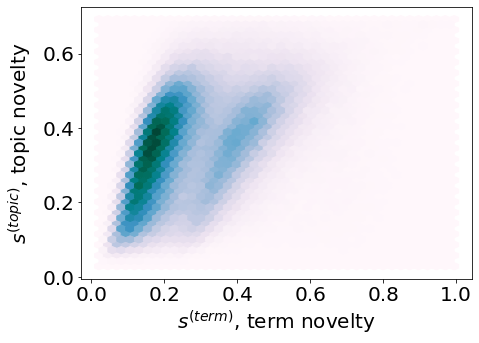

In [71]:
fig, ax = plt.subplots(1,1,figsize = (7,5))

h1 = ax.hexbin(df_all['Cos'], df_all['JSD'], gridsize=40, cmap='PuBuGn')
ax.set_xlabel('$\it{s}^{(term)}$, term novelty', fontsize=20)
ax.set_ylabel('$\it{s}^{(topic)}$, topic novelty', fontsize=20)
ax.yaxis.set_label_coords(-0.12, 0.5)
ax.tick_params(labelsize=20)


In [78]:
first_term_clu = df_all[df_all['Cos']>0.1]
first_term_clu = first_term_clu[first_term_clu['Cos']<0.2]
first_term_clu = first_term_clu[first_term_clu['JSD']>=0.38]
first_term_clu = first_term_clu[first_term_clu['JSD']<=0.42]

In [79]:
second_term_clu = df_all[df_all['Cos']>0.3]
second_term_clu = second_term_clu[second_term_clu['Cos']<0.4]
second_term_clu = second_term_clu[second_term_clu['JSD']>=0.38]
second_term_clu = second_term_clu[second_term_clu['JSD']<=0.42]

In [80]:
len(df_all), len(first_term_clu), len(second_term_clu)

(540992, 15044, 9958)

In [81]:
overrep_control_nov(df_all, first_term_clu, second_term_clu, 'Relationship')

Overrep in first term cluster: 

"James ""Bucky"" Barnes/Steve Rogers" 4.289968672003346
Castiel/Dean Winchester 2.8766880692813483
Poe Dameron/Finn 2.1133289720595747
Leo Fitz/Jemma Simmons 1.8600406386205053
"James ""Bucky"" Barnes/Steve Rogers 1.7135558232823072
Steve Rogers/Tony Stark 1.6291101592292685
Jemma Simmons/Grant Ward 1.5531742898891856
Phil Coulson/Melinda May 1.506057913385212
Iwaizumi Hajime/Oikawa Tooru 1.4967229924886247
Sherlock Holmes/Molly Hooper 1.4204245968072629
Hux/Kylo Ren 1.3643628405364854
Skye/Grant Ward 1.3489886710516295
"James ""Bucky"" Barnes/Tony Stark" 1.282291943822156
Dean Winchester/Sam Winchester 1.1820838585816704
James ""Bucky"" Barnes & Steve Rogers" 1.1711612628319337

Overrep in second term cluster: 

Draco Malfoy/Harry Potter 1.5459486600039503
Harry Potter/Severus Snape 1.4755959916131431
Hermione Granger/Ron Weasley 1.081041549438919
Sirius Black/Remus Lupin 1.069952039381188
Lily Evans/James Potter 1.0587727378634353
Hermione Granger/Dra

In [82]:
overrep_control_nov(df_all, first_term_clu, second_term_clu, 'ArchiveWarnings')

Overrep in first term cluster: 

No Archive Warnings Apply 1.9944553103000076
Creator Chose Not To Use Archive Warnings -0.27717588987537545
Underage -0.6433992913950067
Rape/Non-Con -0.6945739901358294
Graphic Depictions Of Violence -0.833398142381172
Major Character Death -0.9546896731569597

Overrep in second term cluster: 

Major Character Death 0.9546896731569597
Graphic Depictions Of Violence 0.833398142381172
Rape/Non-Con 0.6945739901358294
Underage 0.6433992913950067
Creator Chose Not To Use Archive Warnings 0.27717588987537545
No Archive Warnings Apply -1.9944553103000076


In [83]:
overrep_control_nov(df_all, first_term_clu, second_term_clu, 'Category')

Overrep in first term cluster: 

M/M 4.316740226202303
GenM/M 0.4277776900597863
M/MF/MGen 0.30893046841753624
F/FM/MOther 0.2986244325909599
OtherM/M 0.24266623844677254
M/MGen 0.23768583504694013
GenM/MF/M 0.21092198636148773
GenMultiOther 0.19935690658357394
F/MGenM/MMulti 0.19933999331232172
F/MGenMultiOther 0.17634284519287755
F/MGenMulti 0.13398003036789638
F/MM/M 0.11267772025589105
MultiM/M 0.10988593044314113
F/MGenOther 0.10590712309381656
F/FGenM/M 0.10468529324719564

Overrep in second term cluster: 

F/F 2.5186269860855526
Gen 2.29784946023001
Other 0.5660830247728016
F/FMulti 0.4861296566844836
GenF/F 0.4646920032804655
GenF/M 0.4575820300107197
GenOther 0.44480382152524295
F/FF/MOther 0.43365819782905457
Multi 0.40555076244158283
F/MF/FMulti 0.38726027792775086
F/FF/M 0.37293088906799055
F/FF/MMulti 0.3709243773026742
GenOtherMulti 0.3689541863472234
F/FGen 0.3671654040484402
F/FF/MGenM/M 0.36363604790309095


In [84]:
overrep_control_nov(df_all, first_term_clu, second_term_clu, 'Characters')

Overrep in first term cluster: 

"James ""Bucky"" Barnes 3.9250769737258135
Dean Winchester 3.2027796567719315
Steve Rogers 3.1627961172522117
Steve Rogers" 2.9870286338387095
Castiel 2.8470596634539174
"Steve Rogers 2.715437461943587
Tony Stark 2.189712853708351
James ""Bucky"" Barnes 2.0944027169705923
James ""Bucky"" Barnes" 2.044680816700879
Iwaizumi Hajime 1.9710584966608844
Jemma Simmons 1.962920289548265
Oikawa Tooru 1.9118740303418473
Natasha Romanov 1.9021197811395376
Leo Fitz 1.8741351110305997
Clint Barton 1.7978431703294422

Overrep in second term cluster: 

Harry Potter 2.762827857928033
Hermione Granger 2.282718037794378
Draco Malfoy 2.2082685461512166
Severus Snape 2.158089583342979
Ron Weasley 1.613115861148723
Ginny Weasley 1.5941790222744407
England (Hetalia: Axis Powers) 1.4898822471665374
Sirius Black 1.3860510413433584
Dave Strider 1.3819688904841698
Remus Lupin 1.3693012360098327
Karkat Vantas 1.3251090369938496
America (Hetalia: Axis Powers) 1.319587425934258
Ros

In [85]:
overrep_control_nov(df_all, first_term_clu, second_term_clu, 'Rating')

Overrep in first term cluster: 

Teen And Up Audiences 0.4680791829418902
Not Rated 0.4180679332663678
General Audiences 0.2592061359967127
Explicit -0.2621082213068049
Mature -0.8753495901416123

Overrep in second term cluster: 

Mature 0.8753495901416123
Explicit 0.2621082213068049
General Audiences -0.2592061359967127
Not Rated -0.4180679332663678
Teen And Up Audiences -0.4680791829418902
